<a href="https://colab.research.google.com/github/PrajsPrabs/UpgradBACaseStudy/blob/main/EComm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [766]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [767]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")


# Data Understanding

In [768]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")

In [769]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [770]:
## correct the datatypes
EleData['order_date']=pd.to_datetime(EleData['order_date'])
EleData['Year']=EleData['Year'].astype(str)
EleData['Month']=EleData['Month'].astype(str)

In [771]:
##  MMM is on subcategories : 'Camera','HomeAudio','GamingAccessory' hence dropping other rows
EleData.product_analytic_sub_category.value_counts()
EleData = EleData.loc[EleData.product_analytic_sub_category.isin(['Camera','HomeAudio','GamingAccessory'])]
EleData.product_analytic_sub_category.value_counts()


GamingAccessory    201899
HomeAudio          124860
Camera             101172
Name: product_analytic_sub_category, dtype: int64

In [772]:
## dates between July 2015 to June 2016
EleData=EleData.loc[(EleData.order_date >= '2015-07-01') &(EleData.order_date<'2016-07-01')]

In [773]:
EleData.describe()

,order_id,order_item_id,units,sla,product_mrp,product_procurement_sla
count,4.277750e+05,4.277750e+05,427775.000000,427775.000000,427775.000000,427775.000000
mean,2.845230e+15,1.321295e+16,1.021941,5.469492,8297.878123,2.578220
std,1.268358e+15,5.458201e+16,0.222356,2.658440,13781.504587,1.960068
min,1.528676e+08,2.072001e+08,1.000000,0.000000,0.000000,-1.000000
25%,1.600075e+15,1.603993e+15,1.000000,4.000000,900.000000,1.000000
50%,2.611817e+15,2.618906e+15,1.000000,5.000000,2000.000000,2.000000
75%,3.610341e+15,4.397844e+15,1.000000,7.000000,6900.000000,3.000000
max,4.641665e+15,3.000373e+17,19.000000,60.000000,280000.000000,15.000000


In [774]:
## removing duplicate order items records
EleData= EleData.drop_duplicates(subset=["order_id","order_item_id"],keep='first')

In [775]:
# EleData.info()
Ele_obj_columns=[]
for i in EleData.columns:
  if EleData[i].dtype=='object':
    Ele_obj_columns.append(i)

In [776]:
## removing duplicates using strip and lower and keep first instance
Ele_obj_columns
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.strip())
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.lower())
EleData= EleData.drop_duplicates(keep='first')
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

In [777]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

# Data Cleaning

In [778]:
EleData.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [779]:
## Year and Month

print(EleData.Year.value_counts())
print(EleData.Month.value_counts())

2016    217241
2015    179448
Name: Year, dtype: int64
10    52752
12    43314
1     41236
2     39987
3     38840
5     37301
11    35110
4     31092
6     28785
9     25571
7     22667
8        34
Name: Month, dtype: int64


In [780]:
## gmv
EleData.gmv.isna().sum()
print(EleData.loc[EleData.gmv==''].count())
# trying to impute using mrp
EleData.loc[EleData.gmv=='',"gmv"]=EleData.units*EleData.product_mrp
EleData.gmv=EleData['gmv'].astype(float).round(2)
EleData.loc[(EleData.gmv==0) | (EleData.gmv < 0)].head(10)
EleData.loc[(EleData.gmv==0) | (EleData.gmv < 0)]['gmv']=EleData.units*EleData.product_mrp

fsn_id                             1032
order_date                         1032
Year                               1032
Month                              1032
order_id                           1032
order_item_id                      1032
gmv                                1032
units                              1032
deliverybdays                      1032
deliverycdays                      1032
s1_fact.order_payment_type         1032
sla                                1032
cust_id                            1032
pincode                            1032
product_analytic_super_category    1032
product_analytic_category          1032
product_analytic_sub_category      1032
product_analytic_vertical          1032
product_mrp                        1032
product_procurement_sla            1032
dtype: int64


In [781]:
# deliverybdays
EleData[EleData.deliverybdays=='\\N']
EleData.deliverybdays.replace('\\N','NA',inplace=True)
EleData.info()
EleData[EleData.deliverycdays=='\\N']
EleData.deliverycdays.replace('\\N','NA',inplace=True)
EleData.deliverybdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.deliverycdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.drop(["deliverybdays","deliverycdays"],1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  float64       
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

In [782]:
# order_paymeny_type
EleData["s1_fact.order_payment_type"].value_counts()
EleData.rename(columns={"s1_fact.order_payment_type":"order_payment_type"},inplace=True)
EleData.order_payment_type.value_counts()

cod        279237
prepaid    117452
Name: order_payment_type, dtype: int64

In [783]:
# sla
EleData.sla=EleData.sla.astype(int)
EleData[EleData.sla==0].shape[0]/EleData.shape[0]
## impute with median
EleData[EleData.sla==0]['sla'] = EleData.sla.median()


In [784]:
EleData.pincode.value_counts()
## Too many groups , plus format isnt correct so drooping it
EleData.drop(["pincode"],1,inplace=True)

In [785]:
## product analytics category , sub category and vertical

print(EleData.product_analytic_category.value_counts())
print(EleData.product_analytic_sub_category.value_counts())
print(EleData.product_analytic_vertical.value_counts())
##droppning supercategory as its having only 1 value
EleData.drop(['product_analytic_super_category'],1,inplace=True)

gaminghardware        185520
entertainmentsmall    115082
camera                 96087
Name: product_analytic_category, dtype: int64
gamingaccessory    185520
homeaudio          115082
camera              96087
Name: product_analytic_sub_category, dtype: int64
homeaudiospeaker         79892
gamingheadset            59678
dslr                     55051
gamepad                  52953
point & shoot            35524
gamingmouse              34848
fmradio                  25403
gamingaccessorykit        7637
tvoutcableaccessory       6665
gamingkeyboard            6246
gamingmemorycard          5949
gamingmousepad            4197
voicerecorder             3406
gamingadapter             3042
joystickgamingwheel       2674
boombox                   2463
instant cameras           2416
sportsandaction           2173
dock                      1893
hifisystem                1407
motioncontroller          1042
camcorders                 923
gamingspeaker              496
dockingstation            

In [786]:
## vertical grouping
print(EleData[['product_analytic_sub_category','product_analytic_vertical']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))
vertical1=(EleData.product_analytic_vertical.value_counts()<20000)[EleData.product_analytic_vertical.value_counts()<20000].index
EleData.product_analytic_vertical.value_counts()<20000

   product_analytic_sub_category product_analytic_vertical      0
21                        camera                camcorders    923
17                        camera           sportsandaction   2173
16                        camera           instant cameras   2416
4                         camera             point & shoot  35524
2                         camera                      dslr  55051
31               gamingaccessory          gamecontrolmount      1
28               gamingaccessory                 gaminggun      4
27               gamingaccessory     gamingchargingstation     43
26               gamingaccessory                coolingpad     45
22               gamingaccessory             gamingspeaker    496
20               gamingaccessory          motioncontroller   1042
14               gamingaccessory       joystickgamingwheel   2674
13               gamingaccessory             gamingadapter   3042
11               gamingaccessory            gamingmousepad   4197
10        

homeaudiospeaker         False
gamingheadset            False
dslr                     False
gamepad                  False
point & shoot            False
gamingmouse              False
fmradio                  False
gamingaccessorykit        True
tvoutcableaccessory       True
gamingkeyboard            True
gamingmemorycard          True
gamingmousepad            True
voicerecorder             True
gamingadapter             True
joystickgamingwheel       True
boombox                   True
instant cameras           True
sportsandaction           True
dock                      True
hifisystem                True
motioncontroller          True
camcorders                True
gamingspeaker             True
dockingstation            True
djcontroller              True
soundmixer                True
coolingpad                True
gamingchargingstation     True
gaminggun                 True
slingbox                  True
karaokeplayer             True
gamecontrolmount          True
Name: pr

In [787]:
EleData["product_analytic_vertical_derived"]=EleData.product_analytic_vertical.replace(vertical1,"Others")

In [788]:
## product MRP
EleData.product_mrp.astype(float)

1598        3999.0
1599        3999.0
1600        3999.0
1601        3999.0
1602        3999.0
            ...   
1542374    10500.0
1542375    10500.0
1542376    10500.0
1542377    10500.0
1542378    10500.0
Name: product_mrp, Length: 396689, dtype: float64

Outlier treatment and Feature Engineering

In [789]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   fsn_id                             396689 non-null  object        
 1   order_date                         396689 non-null  datetime64[ns]
 2   Year                               396689 non-null  object        
 3   Month                              396689 non-null  object        
 4   order_id                           396689 non-null  float64       
 5   order_item_id                      396689 non-null  float64       
 6   gmv                                396689 non-null  float64       
 7   units                              396689 non-null  int64         
 8   order_payment_type                 396689 non-null  object        
 9   sla                                396689 non-null  int64         
 10  cust_id         

In [790]:
EleData.Year=EleData.Year.astype(object)
EleData.Month=EleData.Month.astype(object)
EleData.columns


Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla', 'cust_id',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived'],
      dtype='object')

In [791]:
## Deleting columns which wont be required
EleData2=EleData.drop(['fsn_id','cust_id','product_analytic_vertical','order_id'],1)


In [792]:
## integer column handling
num=[]
obj=[]
for i in EleData2.columns:
  if EleData2[i].dtype=='float64':
    num.append(i)
  if EleData2[i].dtype=='int64':
    num.append(i)
  if EleData2[i].dtype=='object':
    obj.append(i)


num.remove('order_item_id')


In [793]:
# EleData2[num].describe()
num

['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla']

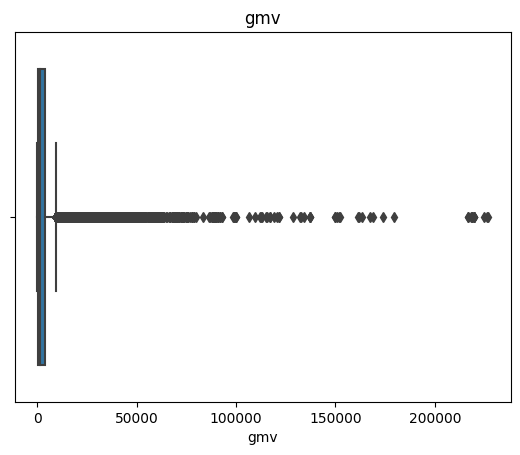

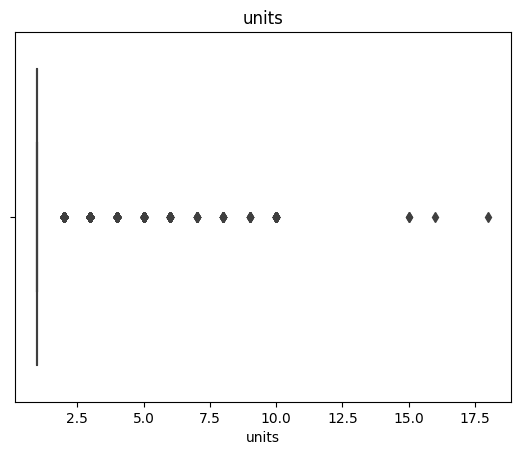

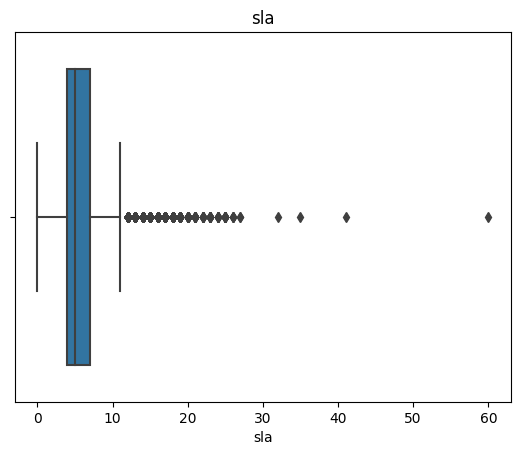

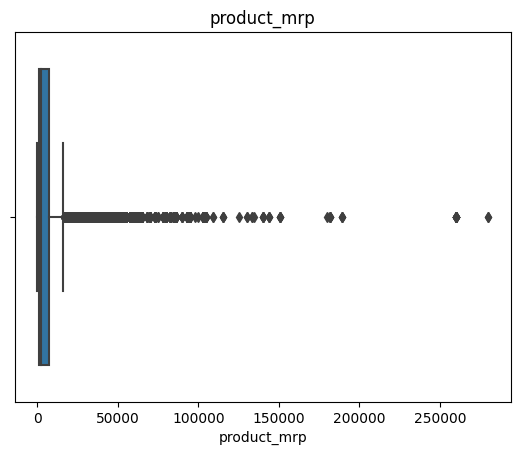

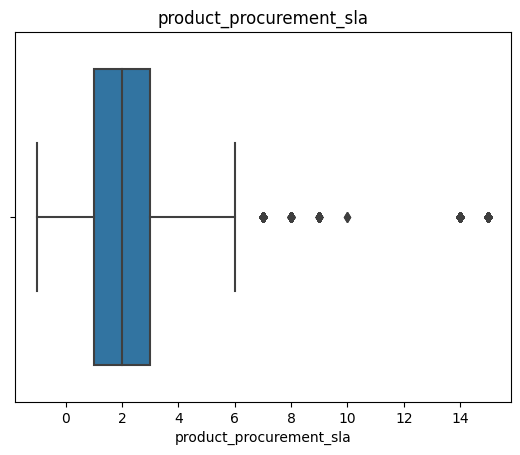

In [794]:
x=1
for i in num:
  plt.title(i)
  sns.boxplot(x=EleData2[i])
  plt.show()
  x=x+1

In [795]:
for i in num:
  q1=EleData2[i].quantile(0.25)
  q3=EleData2[i].quantile(0.75)
  iqr=q3-q1
  lw=iqr-(q1*1.5)
  up=iqr+(q3*1.5)
  print(i,lw,up)
  EleData2.loc[EleData2[i]<lw,i]=lw
  EleData2.loc[EleData2[i]>up,i]=up

gmv 2926.5 9673.5
units -1.5 1.5
sla -3.0 13.5
product_mrp 4615.0 16525.0
product_procurement_sla 0.5 6.5


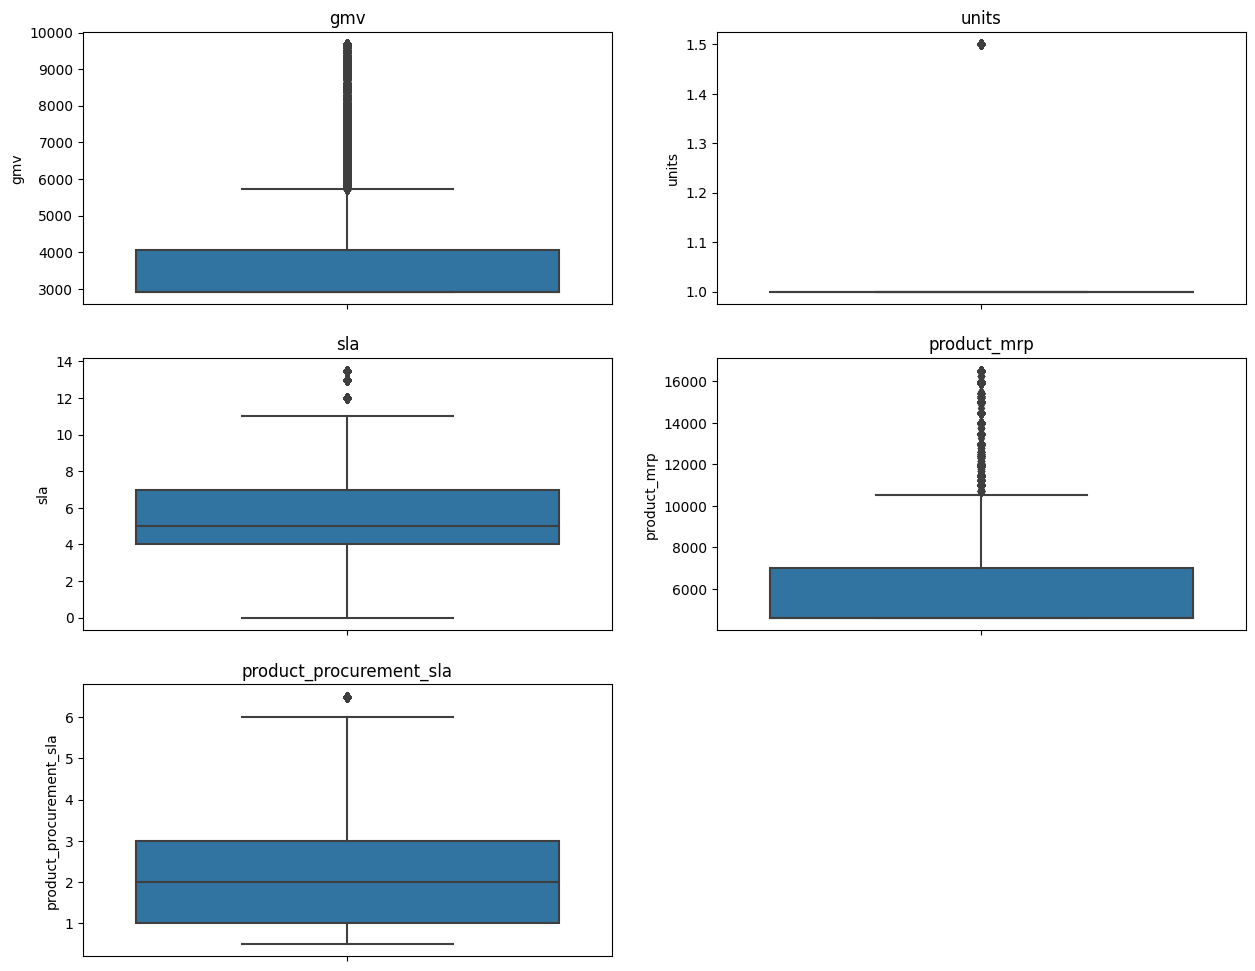

In [796]:
plt.figure(figsize=(15, 12))
x=1
for i in num:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.boxplot(y=EleData2[i])
  x=x+1


# Data Analysis and feature extraction

In [797]:
EleData2.columns
EleData2.order_date=EleData2['order_date'].dt.date

In [798]:
## Week
EleData2['week']=((pd.to_datetime(EleData2['order_date'])-pd.to_datetime('2015-07-01'))/7)
EleData2['week']=EleData2['week'].apply(lambda x: x.days+1)
EleData2.loc[:,['order_date','week']]
EleData2.week.value_counts()

16    28665
44    13958
19    13320
30    12482
36    12240
25    12165
34    12092
48    11047
26     9762
32     9499
37     9451
23     9406
28     9009
35     9000
24     8572
27     8469
31     8251
33     8234
46     8168
17     8050
18     8009
47     7703
29     7569
22     7451
45     7425
49     7367
40     7159
41     7121
38     7101
50     6966
39     6799
20     6620
51     6530
3      6495
10     6405
15     6284
2      6262
52     6198
13     6190
21     5959
4      5754
12     5640
11     5636
14     5561
42     5282
5      2558
43     2532
53     1724
1      1600
9       942
6         4
8         2
7         1
Name: week, dtype: int64

In [799]:
# 2. Pricing Discounts
EleData2['listing_price'] = (EleData2.gmv/EleData2.units).round(2)
EleData2['discount_per']=(((EleData2['product_mrp']-EleData2['listing_price'])/EleData2['product_mrp'])*100).round(0)
EleData2.discount_per

1598       33.0
1599       37.0
1600       37.0
1601       37.0
1602       37.0
           ... 
1542374    50.0
1542375    50.0
1542376    59.0
1542377    56.0
1542378    49.0
Name: discount_per, Length: 396689, dtype: float64

In [800]:
## joining rest of the data and calculating other variables from it
# ProdList
# Investment
# MonthlyNPS
# SalesCal
# Ont2015
# Ont2016


In [822]:
## sales Calendar
SalesCal = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Special Sale Calendar")

SalesCal.head(20)

SalesCal1=pd.DataFrame(['2015-07-18','2015-07-19','2015-08-15','2015-08-16','2015-08-17','2015-08-28','2015-08-29','2015-08-30',
                        '2015-10-15','2015-10-16','2015-10-17','2015-11-07','2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12',
                        '2015-11-13','2015-11-14','2015-12-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30','2015-12-31',
                        '2016-01-01','2016-01-02','2016-01-03','2016-01-20','2016-01-21','2016-01-22','2016-02-01','2016-02-02','2016-02-20','2016-02-21',
                       '2016-02-14','2016-02-15','2016-03-07','2016-03-08','2016-03-09','2016-05-25','2016-05-26','2016-05-27'])

SalesCal1=SalesCal1[0].to_list()
EleData2['sale']=0
EleData2.loc[EleData.order_date.isin(SalesCal1),'sale']=1
EleData2.loc[EleData2.sale==1]
EleData2.rename(columns={"sale":"sale_day_flag"},inplace=True)


In [802]:
EleData2.info()
EleData2.week=EleData2.week.astype(object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_date                         396689 non-null  object 
 1   Year                               396689 non-null  object 
 2   Month                              396689 non-null  object 
 3   order_item_id                      396689 non-null  float64
 4   gmv                                396689 non-null  float64
 5   units                              396689 non-null  float64
 6   order_payment_type                 396689 non-null  object 
 7   sla                                396689 non-null  float64
 8   product_analytic_category          396689 non-null  object 
 9   product_analytic_sub_category      396689 non-null  object 
 10  product_mrp                        396689 non-null  int64  
 11  product_procurement_sla            

In [803]:
### Weather
Ont2015=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2015.xlsx",header=24)
Ont2016=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2016.xlsx",header=24)
Ont_Weather = pd.concat([Ont2015,Ont2016])
Ont_Weather=Ont_Weather.loc[(Ont_Weather['Date/Time']>='2015-07-01') &(Ont_Weather['Date/Time']<'2016-07-01')]

# Ont2015['Max Temp Flag'].value_counts()
todrop= (Ont_Weather.isnull().sum()/Ont_Weather.shape[0]).reset_index()
todrop
req=todrop.loc[todrop[0]<0.50,:]['index'].to_list()
Ont_Weather=Ont_Weather[req]
Ont_Weather =Ont_Weather.drop(['Total Precip (mm)','Snow on Grnd (cm)','Data Quality'],1)

# Ont_Weather
Ont_Weather['week']=((pd.to_datetime(Ont_Weather['Date/Time'])-pd.to_datetime('2015-07-01'))/7)
Ont_Weather['week']=Ont_Weather['week'].apply(lambda x: x.days+1)
Ont_Weather['Date/Time']=Ont_Weather['Date/Time'].dt.date

In [804]:

Ont_Weather=Ont_Weather.sort_values(by='Date/Time')
Ont_Weather.info()
Ont_Weather.rename(columns={"Max Temp (°C)":"max_temp_c","Min Temp (°C)":"mon_temp_c","Mean Temp (°C)":"mean_temp_c",
                            "Heat Deg Days (°C)":"heat_deg_c","Cool Deg Days (°C)":"cool_deg_c","Total Rain (mm)":"total_rain",
                            "Total Snow (cm)":"total_snow"},inplace=True)
## filling missing values with fronyfill method as temp is time series
Ont_Weather.ffill(inplace=True)
Ont_Weather.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 181 to 181
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           366 non-null    object 
 1   Year                366 non-null    int64  
 2   Month               366 non-null    int64  
 3   Day                 366 non-null    int64  
 4   Max Temp (°C)       208 non-null    float64
 5   Min Temp (°C)       191 non-null    float64
 6   Mean Temp (°C)      191 non-null    float64
 7   Heat Deg Days (°C)  191 non-null    float64
 8   Cool Deg Days (°C)  191 non-null    float64
 9   Total Rain (mm)     215 non-null    float64
 10  Total Snow (cm)     215 non-null    float64
 11  week                366 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 37.2+ KB


Date/Time      0
Year           0
Month          0
Day            0
max_temp_c     0
mon_temp_c     0
mean_temp_c    0
heat_deg_c     0
cool_deg_c     0
total_rain     0
total_snow     0
week           0
dtype: int64

In [805]:
EleData2=pd.merge(EleData2,Ont_Weather,left_on=EleData2['order_date'],right_on=Ont_Weather['Date/Time'],how='left')


In [883]:
# MonthlyNPS
MonthlyNPS = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Monthly NPS Score")
# ?pd.melt
MonthlyNPS.head()
NPS = pd.melt(MonthlyNPS,id_vars="Unnamed: 0",value_vars=["July'15","Aug'15","Sept'15","Oct'15","Nov'15",
                                                  "Dec'15","Jan'16","Feb'16","Mar'16","Apr'16",
                                                  "May'16","June'16"],).reset_index()
# ?pd.pivot
NPS.rename(columns={"Unnamed: 0":"Header","variable":"Month1","value":"Value"},inplace=True)
# NPS
# NPS
NPS['Month']=0
NPS.loc[NPS["Month1"].str.startswith("July"), "Month"] = 7
NPS.loc[NPS["Month1"].str.startswith("Aug"), "Month"] = 8
NPS.loc[NPS["Month1"].str.startswith("Sept"), "Month"] = 9
NPS.loc[NPS["Month1"].str.startswith("Oct"), "Month"] = 10
NPS.loc[NPS["Month1"].str.startswith("Nov"), "Month"] = 11
NPS.loc[NPS["Month1"].str.startswith("Dec"), "Month"] = 12
NPS.loc[NPS["Month1"].str.startswith("Jan"), "Month"] = 1
NPS.loc[NPS["Month1"].str.startswith("Feb"), "Month"] = 2
NPS.loc[NPS["Month1"].str.startswith("Mar"), "Month"] = 3
NPS.loc[NPS["Month1"].str.startswith("Apr"), "Month"] = 4
NPS.loc[NPS["Month1"].str.startswith("May"), "Month"] = 5
NPS.loc[NPS["Month1"].str.startswith("June"), "Month"] = 6
NPS['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016])
NPS['Month']=NPS['Month'].astype(str)
NPS.drop("index",1,inplace=True)


KeyError: ignored

In [824]:
# EleData2.info()
# EleData2.rename(columns={"Year_x":"Year","Month_x":"Month"},inplace=True)
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='Stock Index'],how='left',on='Month')
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='NPS'],how='left',on='Month')
# EleData2['Year_x'].count()
EleData2.rename(columns={"Value_x":"Stock_Index","Value_y":"NPS"},inplace=True)


In [837]:
# sales , nps weather, weather
# lets clean the frame with _x _y coluumns
EleData2['Year']=EleData2['Year_x']
for i in EleData2.columns:
  if (str(i).endswith("_x")) | (str(i).endswith("_y") | (str(i)=='key_0')):
    EleData2.drop(i,1,inplace=True)


In [838]:
EleData2.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived',
       'listing_price', 'discount_per', 'sale_day_flag', 'Date/Time', 'Day',
       'max_temp_c', 'mon_temp_c', 'mean_temp_c', 'heat_deg_c', 'cool_deg_c',
       'total_rain', 'total_snow', 'Stock_Index', 'NPS', 'Year'],
      dtype='object')

In [840]:
### Investments

Investment = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",header=2,sheet_name="Media Investment")
Investment.isna().sum()
Investment.fillna(0,inplace=True)
Investment.drop(["Unnamed: 0"],1,inplace=True)
Investment=Investment.loc[Investment.Year!=0]
Investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.0,0.0
1,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.0,0.0
2,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.0,0.0
3,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0
4,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.0,0.0


In [885]:
Investment['month_start'] = pd.to_datetime(Investment[['Year', 'Month']].assign(DAY=1))
Investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,month_start
0,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.0,0.0,2015-07-01
1,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.0,0.0,2015-08-01
2,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.0,0.0,2015-09-01
3,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0,2015-10-01
4,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.0,0.0,2015-11-01


In [ ]:
Investment.head()

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,0.0,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.0,0.0
1,0.0,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.0,0.0
2,0.0,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.0,0.0
3,0.0,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0
4,0.0,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.0,0.0


In [358]:
EleData5=pd.merge(EleData4,Investment,on=['Month','Year'])

In [389]:
# EleData5.drop(['number_of_days','month_start'],1,inplace=True)
EleData5.rename(columns={' Affiliates':'Affiliates'},inplace=True)
EleData5.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394612 entries, 0 to 394611
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_date                         394612 non-null  object 
 1   Year                               394612 non-null  object 
 2   Month                              394612 non-null  object 
 3   order_item_id                      394612 non-null  float64
 4   gmv                                394612 non-null  float64
 5   units                              394612 non-null  float64
 6   order_payment_type                 394612 non-null  object 
 7   sla                                394612 non-null  float64
 8   product_analytic_category          394612 non-null  object 
 9   product_analytic_sub_category      394612 non-null  object 
 10  product_mrp                        394612 non-null  float64
 11  product_procurement_sla            3946

,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
week,,,,
-25,4.800000,0.800000,5.60,0.200000
-24,0.000000,0.000000,0.00,4.000000
-23,0.400000,0.000000,0.40,0.666667
-22,0.000000,0.000000,0.00,1.333333
-21,0.000000,5.000000,5.00,10.250000
...,...,...,...,...
75,2.050000,0.000000,2.05,0.000000
76,0.000000,4.200000,4.20,8.400000
77,0.333333,1.666667,2.00,17.333333


In [391]:
## aggregating everything at week level


sales_dist = EleData5[['sale_day_flag','order_date','week']].drop_duplicates()

weekly_sales_day =sales_dist.loc[sales_dist['sale_day_flag']==1].groupby('week')['sale_day_flag'].sum().reset_index()


## order item count for each week and product sub cat
oc =EleData5.groupby(['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'])['order_item_id'].count()


## sum of units, payment types and type of product verticals  at week and product category level
g1=EleData5.groupby(['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'])['gmv','units'].sum().reset_index()

# product mrp , product sla , discount avg is considered
prd_week_level=EleData5.groupby(['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'])['sla','product_mrp','product_procurement_sla','discount_per'].agg(['mean']).reset_index()

# Weather and investments , max is considered as the data is at month level
week_level=EleData5.groupby(['week'])['Stock_Index','NPS',
                                      'Total Investment','TV','Digital','Sponsorship',
                                      'Content Marketing','Online marketing','Affiliates','SEM','Radio','Other'].agg(['max']).reset_index()


<ipython-input-391-5c69c91cd70b>:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g1=EleData5.groupby(['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'])['gmv','units'].sum().reset_index()
<ipython-input-391-5c69c91cd70b>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prd_week_level=EleData5.groupby(['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'])['sla','product_mrp','product_procurement_sla','discount_per'].agg(['mean']).reset_index()
<ipython-input-391-5c69c91cd70b>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  week_level=EleData5.groupby(['week'])['Stock_Index','NPS',


In [ ]:
Investment.head()
week_level.head()#0.177062

,week,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Stock_Index,NPS,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,1.0,8.158145,0.0,8.158145,0.0,1177.000000,54.599588,0.017754,0.000224,0.002636,0.007715,9.707571e-07,0.001381,0.000569,0.005228,0.0,0.0
1,2.0,3.989980,0.0,3.989980,0.0,1177.000000,54.599588,0.017754,0.000224,0.002636,0.007715,9.707571e-07,0.001381,0.000569,0.005228,0.0,0.0
2,3.0,0.992013,0.0,0.992013,0.0,1177.000000,54.599588,0.017754,0.000224,0.002636,0.007715,9.707571e-07,0.001381,0.000569,0.005228,0.0,0.0
3,4.0,0.729197,0.0,0.729197,0.0,1177.000000,54.599588,0.017754,0.000224,0.002636,0.007715,9.707571e-07,0.001381,0.000569,0.005228,0.0,0.0
4,5.0,0.000000,0.0,0.000000,0.0,1177.022674,54.603800,0.017744,0.000224,0.002635,0.007710,9.700032e-07,0.001380,0.000569,0.005226,0.0,0.0


In [504]:
weekly=pd.merge(pd.DataFrame(week_level),pd.merge(pd.DataFrame(prd_week_level),pd.DataFrame(g1),on=['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'],how='outer'),on=['week'],how='outer')
weekly=pd.merge(weekly,weekly_sales_day, on ='week',how='left')
weekly = pd.merge(weekly,ont_wk,on='week',how='left')
weekly = pd.merge(weekly,oc,on=['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'],how='left')
# weekly[['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type']].value_counts()


<ipython-input-504-902d4a0c508b>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  weekly=pd.merge(pd.DataFrame(week_level),pd.merge(pd.DataFrame(prd_week_level),pd.DataFrame(g1),on=['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'],how='outer'),on=['week'],how='outer')
<ipython-input-504-902d4a0c508b>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  weekly=pd.merge(pd.DataFrame(week_level),pd.merge(pd.DataFrame(prd_week_level),pd.DataFrame(g1),on=['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'],how='outer'),on=['week'],how='outer')


In [505]:
# weekly.info()
weekly.rename(columns={'sale_day_flag_y':'number_of_sales_in_wk','order_item_id':'order_count'},inplace=True)

for i in weekly.filter(regex='mean').columns:
  m=str(i).replace("', 'mean')",'').replace("('",'').replace("', 'max')",'')
  print(i)
  weekly[m]=weekly[i]
  weekly.drop([i],1,inplace=True)

for i in weekly.filter(regex='max').columns:
  m=str(i).replace("', 'mean')",'').replace("('",'').replace("', 'max')",'')
  print(i)
  weekly[m]=weekly[i]
  weekly.drop([i],1,inplace=True)
# weekly.info() #38


('sla', 'mean')
('product_mrp', 'mean')
('product_procurement_sla', 'mean')
('discount_per', 'mean')
('Stock_Index', 'max')
('NPS', 'max')
('Total Investment', 'max')
('TV', 'max')
('Digital', 'max')
('Sponsorship', 'max')
('Content Marketing', 'max')
('Online marketing', 'max')
('Affiliates', 'max')
('SEM', 'max')
('Radio', 'max')
('Other', 'max')


<ipython-input-505-0b48551b2537>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  weekly.drop([i],1,inplace=True)
<ipython-input-505-0b48551b2537>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  weekly.drop([i],1,inplace=True)
<ipython-input-505-0b48551b2537>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  weekly.drop([i],1,inplace=True)
<ipython-input-505-0b48551b2537>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  weekly.drop([i],1,inplace=True)
<ipython-input-505-0b48551b2537>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  weekly.drop([i],1,inp

In [506]:

# print(weekly.columns)
# weekly.info()
# weekly1.iloc[:,4:8].columns
weekly.drop(weekly.iloc[:,1:2].columns,1,inplace=True)
weekly.drop(weekly.iloc[:,4:8].columns,1,inplace=True)
# weekly.drop(["Year","Month","Day","Data Quality"],1,inplace=True)


<ipython-input-506-2a3f56c547d5>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  weekly.drop(weekly.iloc[:,1:2].columns,1,inplace=True)
<ipython-input-506-2a3f56c547d5>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  weekly.drop(weekly.iloc[:,4:8].columns,1,inplace=True)


In [507]:
weekly['sale_day_flag'].fillna(0,inplace=True)


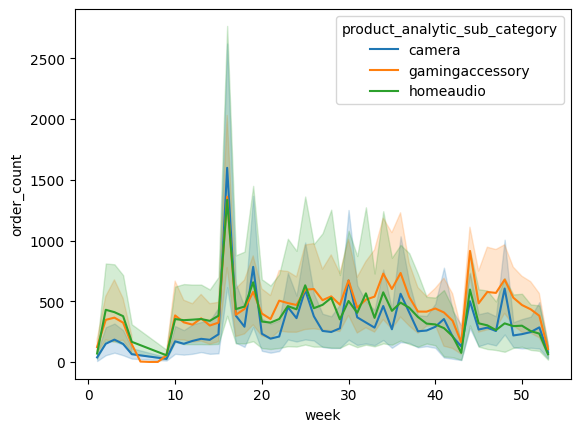

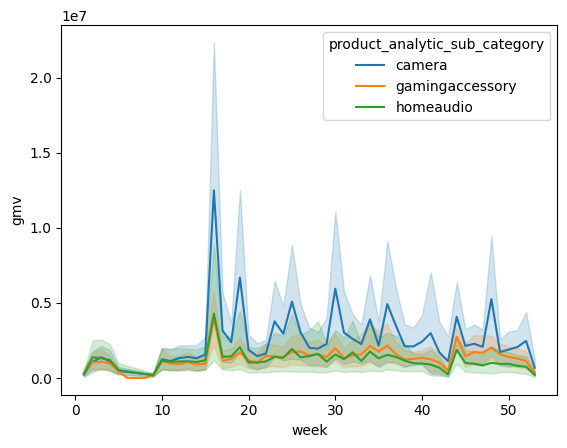

In [508]:
sns.lineplot(x=weekly['week'],y=weekly['order_count'],hue=weekly['product_analytic_sub_category'])
plt.show()
sns.lineplot(x=weekly['week'],y=weekly['gmv'],hue=weekly['product_analytic_sub_category'])
plt.show()

In [515]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   week                               1003 non-null   float64
 1   product_analytic_sub_category      1003 non-null   object 
 2   product_analytic_vertical_derived  1003 non-null   object 
 3   order_payment_type                 1003 non-null   object 
 4   gmv                                1003 non-null   float64
 5   units                              1003 non-null   float64
 6   sale_day_flag                      1003 non-null   float64
 7   Total Rain (mm)                    1003 non-null   float64
 8   Total Snow (cm)                    1003 non-null   float64
 9   Total Precip (mm)                  1003 non-null   float64
 10  Snow on Grnd (cm)                  983 non-null    float64
 11  order_count                        1003 non-null   int64

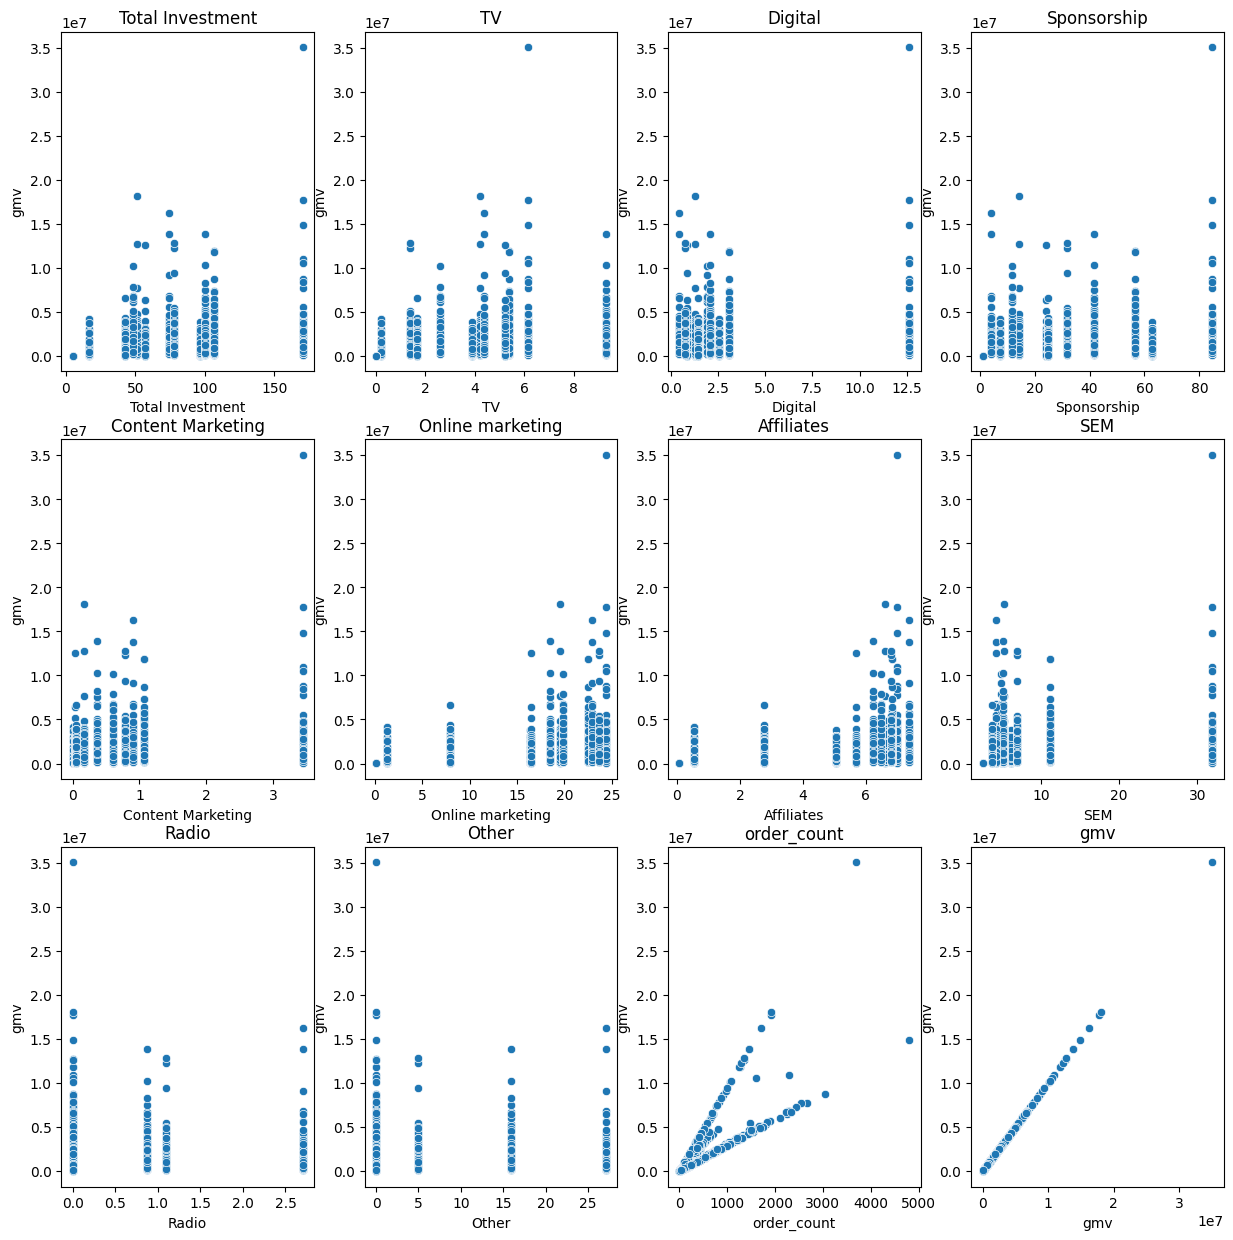

In [510]:
markinv = ['Total Investment','TV','Digital','Sponsorship','Content Marketing','Online marketing','Affiliates','SEM','Radio','Other','order_count','gmv']

plt.figure(figsize=(15, 15))
x=1
for i in markinv:
  plt.subplot(3,4,x)
  plt.title(i)
  sns.scatterplot(y=weekly['gmv'],x=weekly[i])
  x=x+1

## TV : TV investment till 6 is fine , after that not much gmv increase
## Digitial : 3
# Sponsorship : 60
# content : 1
# Ol higher > 15


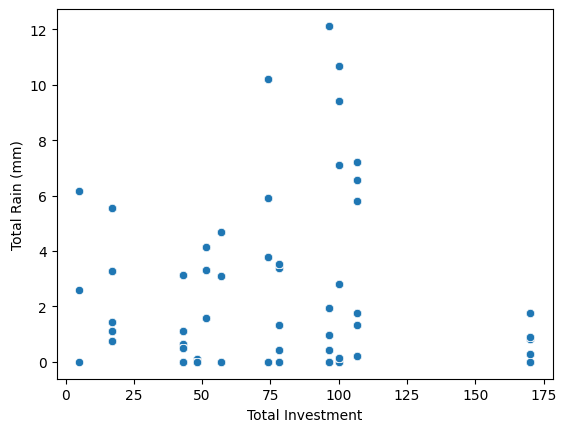

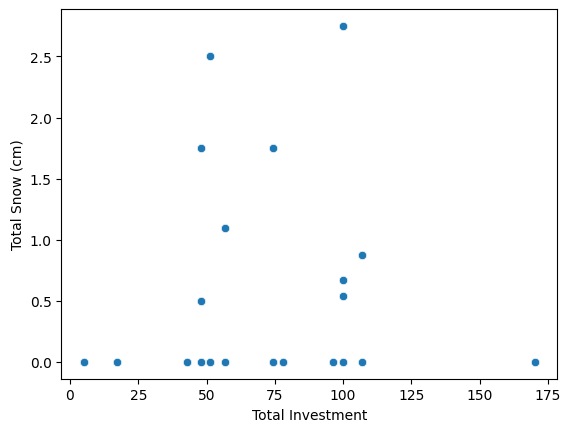

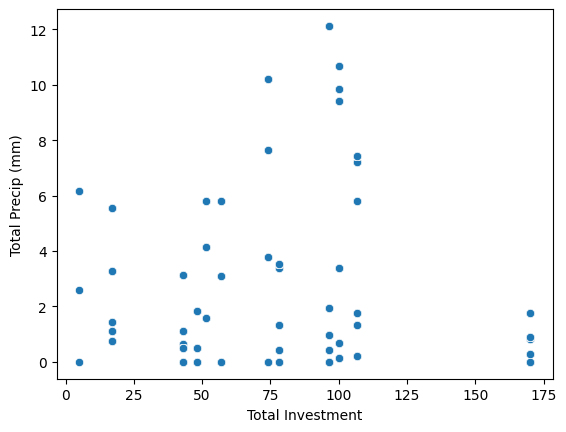

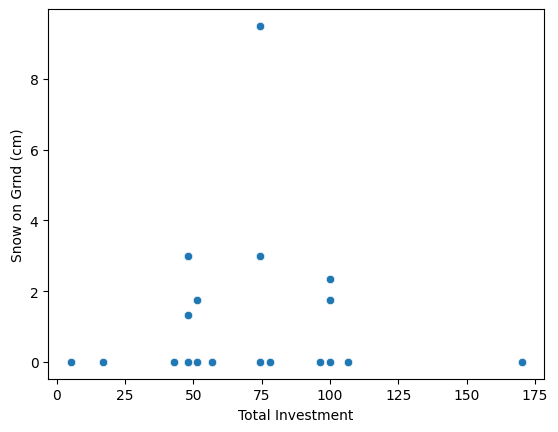

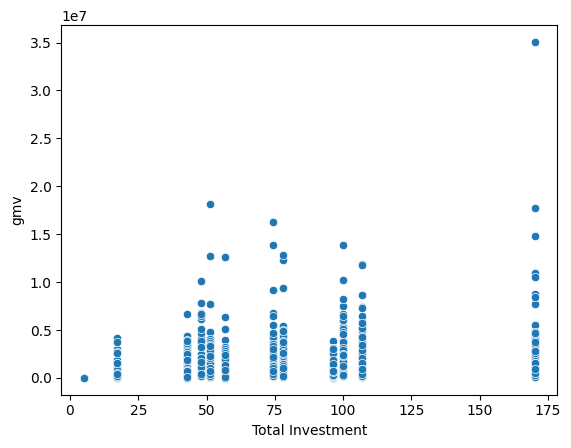

In [514]:
weather =['Total Rain (mm)','Total Snow (cm)','Total Precip (mm)','Snow on Grnd (cm)','gmv']
for i in weather :
  sns.scatterplot(x=weekly['Total Investment'],y=weekly[i])
  plt.show()